In [55]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [56]:
iris = datasets.load_iris()
iris_X = iris.data
y = iris.target

In [57]:
from sklearn import decomposition
pca = decomposition.PCA()
pca

PCA()

In [58]:
iris_pca = pca.fit_transform(iris_X)

In [59]:
print(iris_X[:10, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [60]:
print(iris_pca[:10, :])

[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]
 [-2.28085963e+00  7.41330449e-01  1.68677658e-01  2.42008576e-02]
 [-2.82053775e+00 -8.94613845e-02  2.57892158e-01  4.81431065e-02]
 [-2.62614497e+00  1.63384960e-01 -2.18793179e-02  4.52978706e-02]
 [-2.88638273e+00 -5.78311754e-01  2.07595703e-02  2.67447358e-02]
 [-2.67275580e+00 -1.13774246e-01 -1.97632725e-01  5.62954013e-02]]


In [61]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [62]:
# Most of the variance is on the 0th column, so that is the principle component

In [63]:
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

(150, 2)

In [64]:
pca.explained_variance_ratio_.sum()

0.977685206318795

Text(0.5, 1.0, 'After PCA')

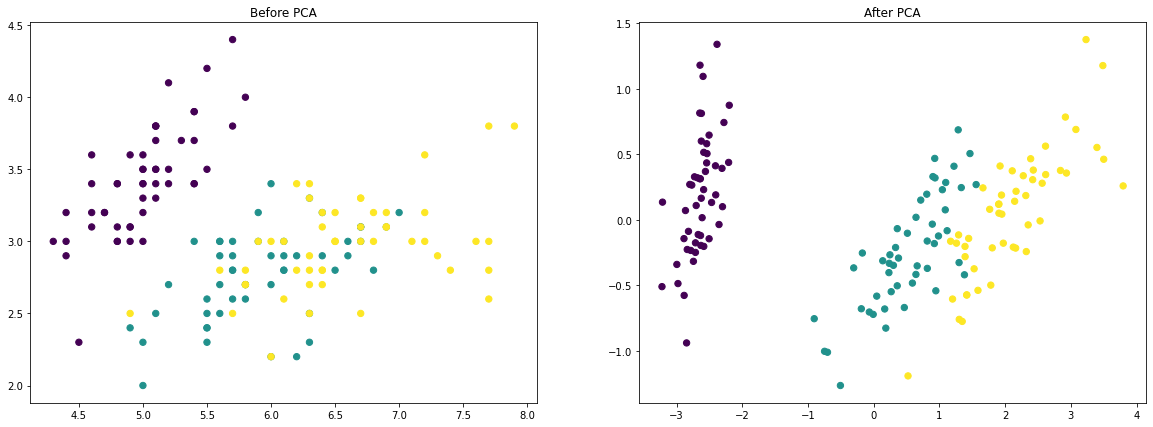

In [65]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X[:, 0], iris_X[:, 1], c=y, s=40)
ax.set_title('Before PCA')

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime[:, 0], iris_X_prime[:, 1], c=y, s=40)
ax2.set_title('After PCA')

In [66]:
pca = decomposition.PCA(n_components=.98)
iris_X_prime = pca.fit_transform(iris_X)
pca.explained_variance_ratio_.sum()
# Atleast 98% of the variance is preserved

0.9947878161267247

Text(0.5, 1.0, 'Scaling followed by PCA')

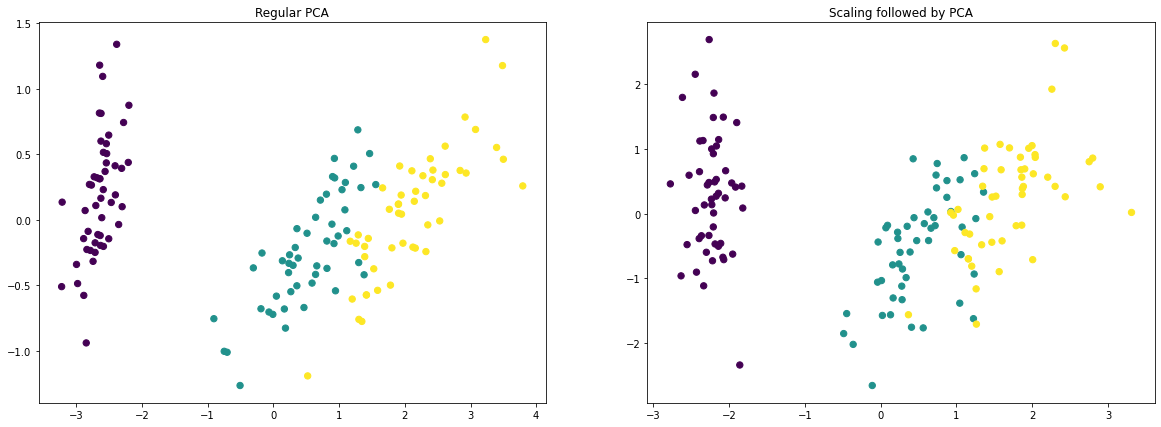

In [67]:
from sklearn import preprocessing
iris_X_scaled = preprocessing.scale(iris_X)
pca = decomposition.PCA(n_components=2)
iris_X_scaled = pca.fit_transform(iris_X_scaled)

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X_prime[:,0],iris_X_prime[:,1],c=y,s=40)
ax.set_title('Regular PCA')

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_scaled[:,0],iris_X_scaled[:,1],c=y,s=40)
ax2.set_title('Scaling followed by PCA')

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('pca', decomposition.PCA(n_components=2))])
iris_X_scaled = pipe.fit_transform(iris_X)

In [69]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

### Factor Analysis

In [70]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2)
iris_two_dim = fa.fit_transform(iris_X)
print(iris_two_dim[:5])

[[-1.32761727 -0.56131076]
 [-1.33763854 -0.00279765]
 [-1.40281483  0.30634949]
 [-1.30104274  0.71882683]
 [-1.33342439 -0.36458899]]


Text(0.5, 1.0, 'PCA')

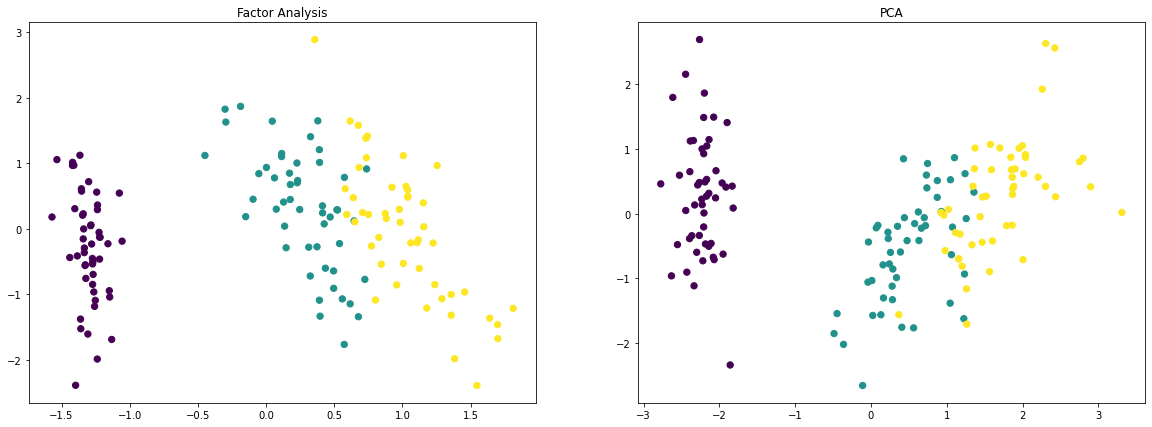

In [71]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_two_dim[:,0],iris_two_dim[:,1],c=y,s=40)
ax.set_title('Factor Analysis')

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_scaled[:,0],iris_X_scaled[:,1],c=y,s=40)
ax2.set_title('PCA')

### Kernel PCA

Text(0.5, 1.0, 'PCA')

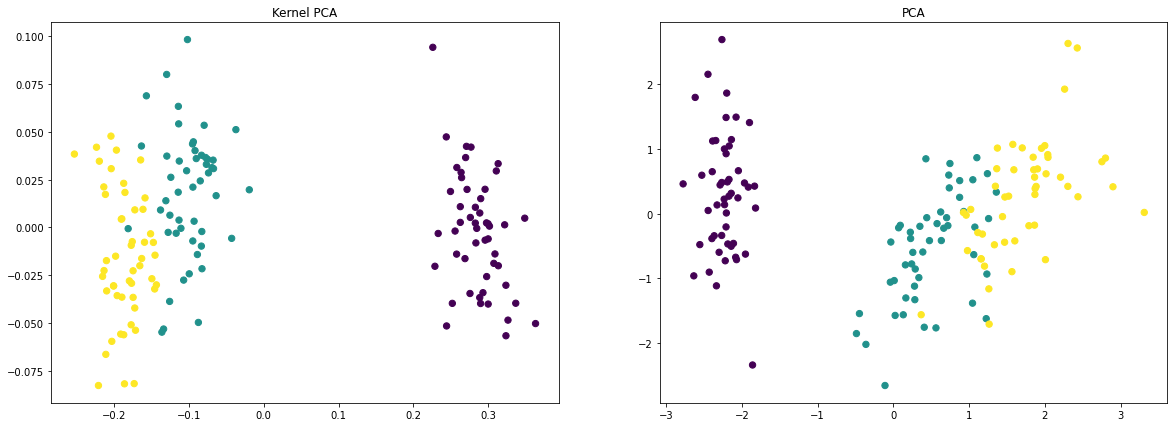

In [72]:
kpca = decomposition.KernelPCA(kernel='cosine', n_components=2)
iris_X_prime = kpca.fit_transform(iris_X)

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X_prime[:,0],iris_X_prime[:,1],c=y,s=40)
ax.set_title('Kernel PCA')

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_scaled[:,0],iris_X_scaled[:,1],c=y,s=40)
ax2.set_title('PCA')

## Truncated SVD

Text(0.5, 1.0, 'PCA')

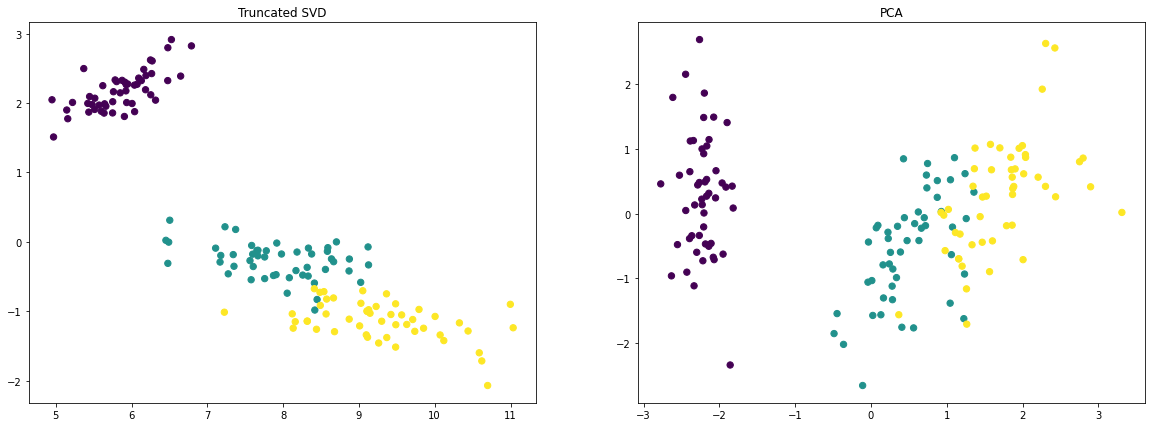

In [73]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_X)

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_transformed[:,0],iris_transformed[:,1],c=y,s=40)
ax.set_title('Truncated SVD')

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_scaled[:,0],iris_X_scaled[:,1],c=y,s=40)
ax2.set_title('PCA')

In [74]:
svd.explained_variance_ratio_

array([0.52875361, 0.44845576])

### Dictionary Learning

In [75]:
X_train = iris_X[::2]
X_test = iris_X[1::2]
y_train = y[::2]
y_test = y[1::2]

In [76]:
from sklearn.decomposition import DictionaryLearning
dl = DictionaryLearning(3)
transformed =dl.fit_transform(X_train)
transformed[:5]

array([[0.        , 6.344753  , 0.        ],
       [0.        , 5.83576099, 0.        ],
       [0.        , 6.32037564, 0.        ],
       [0.        , 5.89324204, 0.        ],
       [0.        , 5.4522191 , 0.        ]])

In [77]:
test_transform = dl.transform(X_test)

Text(0.5, 0.92, 'Testing Set')

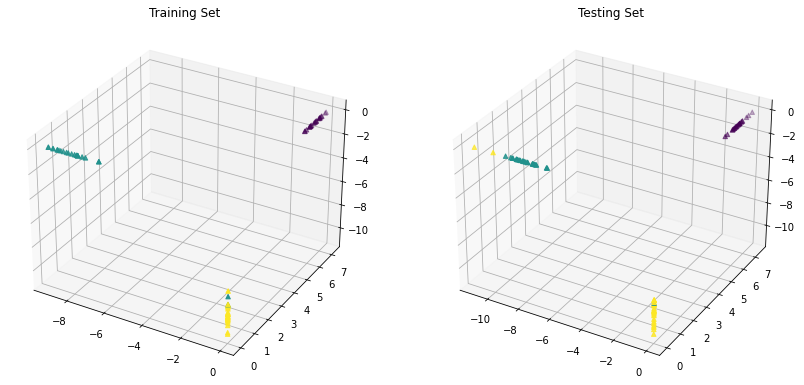

In [78]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(121, projection = '3d')
ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], c=y_train, marker='^')
ax.set_title('Training Set')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(test_transform[:, 0], test_transform[:, 1], test_transform[:, 2], c=y_test, marker='^')
ax2.set_title('Testing Set')

### t-SNE

Text(0.5, 1.0, 'ISO')

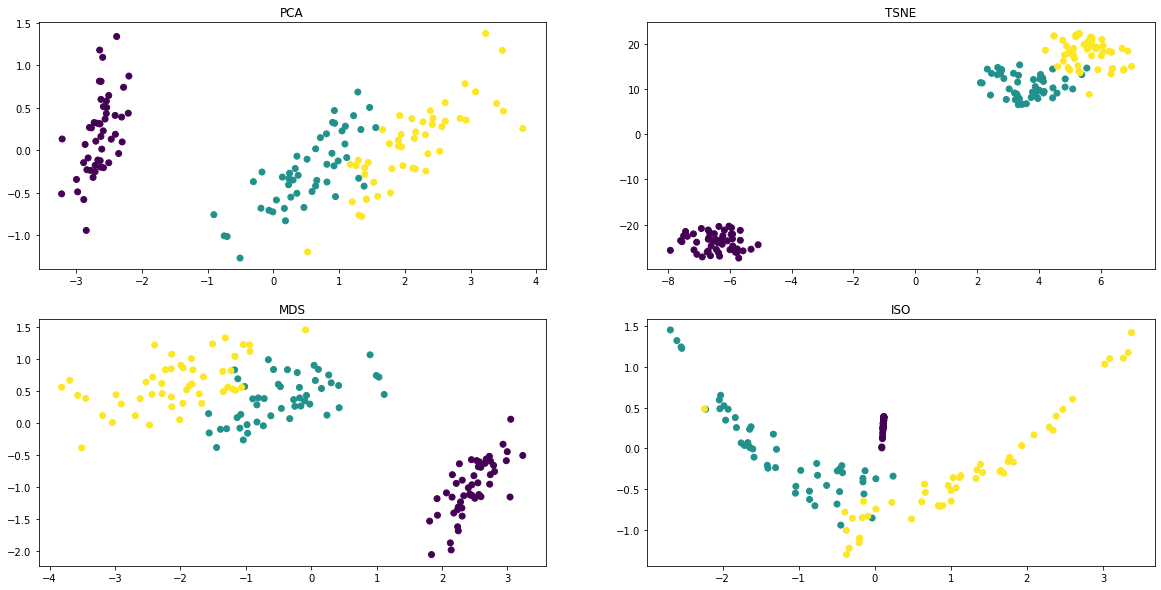

In [80]:
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.decomposition import PCA

iris_pca = PCA(n_components=2).fit_transform(iris_X)
iris_tsne = TSNE(learning_rate=200).fit_transform(iris_X)

iris_MDS = MDS(n_components = 2).fit_transform(iris_X)
iris_ISO = Isomap(n_components = 2).fit_transform(iris_X)

plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.title('PCA')
plt.scatter(iris_pca [:, 0], iris_pca [:, 1], c=y)

plt.subplot(222)
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=y)
plt.title('TSNE')

plt.subplot(223)
plt.scatter(iris_MDS[:, 0], iris_MDS[:, 1], c=y)
plt.title('MDS')

plt.subplot(224)
plt.scatter(iris_ISO[:, 0], iris_ISO[:, 1], c=y)
plt.title('ISO')

Text(0.5, 1.0, 'PCA followed by TSNE')

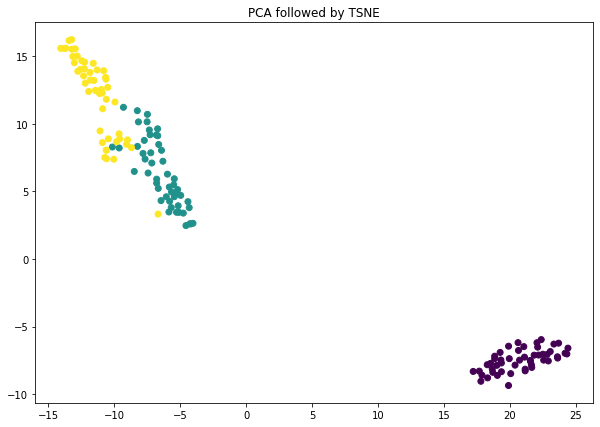

In [81]:
# When dimensions are high, perform pca and then perform tsne
iris_pca_then_tsne = TSNE(learning_rate=200).fit_transform(iris_pca)
plt.figure(figsize=(10, 7))
plt.scatter(iris_pca_then_tsne[:, 0], iris_pca_then_tsne[:, 1], c=y)
plt.title("PCA followed by TSNE")

### Testing methods to reduce dimensionality with pipelines

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.manifold import Isomap
%matplotlib inline

In [83]:
pipe = Pipeline([('reduce_dim', PCA()), ('classify', SVC())])

In [86]:
params_grid = [
    {
        'reduce_dim': [PCA(), NMF(), Isomap(), TruncatedSVD()],
        'reduce_dim__n_components': [2, 3],
        'classify': [SVC(), LinearSVC()],
        'classify__C': [1, 10, 100, 1000],
    }
]


In [87]:
grid = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=params_grid)
grid.fit(iris.data, iris.target)

/home/luna/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/luna/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('reduce_dim', PCA()),
                                       ('classify', SVC())]),
             n_jobs=-1,
             param_grid=[{'classify': [SVC(C=100), LinearSVC()],
                          'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [PCA(), NMF(n_components=3), Isomap(),
                                         TruncatedSVD()],
                          'reduce_dim__n_components': [2, 3]}])

In [88]:
grid.best_params_

{'classify': SVC(C=100),
 'classify__C': 100,
 'reduce_dim': NMF(n_components=3),
 'reduce_dim__n_components': 3}

In [89]:
grid.best_score_

0.98

In [90]:
import pandas as pd
results_df = pd.DataFrame(grid.cv_results_)

In [97]:
grid.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])